In [1]:
!pip install XGBoost
!pip install catboost
!pip install optuna
!pip install LightGBM
!pip install optuna-integration[lightgbm]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

Оптимизация гиперпараметров LightGBM,XGBoost и CatBoost с использованием Optuna


Загрузка датасетов:


In [2]:
from sklearn.model_selection import train_test_split
df_m_train = pd.read_csv("train_Mortgage.csv")
df_p_train = pd.read_csv("train_Pension.csv")
df_s_train = pd.read_csv("train_Savings.csv")
target_name_1 = "Mortgage"
target_name_2 = "Pension"
target_name_3 = "Savings"
y_train_m = df_m_train[target_name_1]
y_train_p = df_p_train[target_name_2]
y_train_s = df_s_train[target_name_3]
X_train_m = df_m_train.drop(columns=[target_name_1])
X_train_p = df_p_train.drop(columns=[target_name_2])
X_train_s = df_s_train.drop(columns=[target_name_3])

In [3]:
df_m_valid = pd.read_csv("val_Mortgage.csv")
df_p_valid = pd.read_csv("val_Pension.csv")
df_s_valid = pd.read_csv("val_Savings.csv")
y_test_m = df_m_valid[target_name_1]
y_test_p = df_p_valid[target_name_2]
y_test_s = df_s_valid[target_name_3]
X_test_m = df_m_valid.drop(columns=[target_name_1])
X_test_p = df_p_valid.drop(columns=[target_name_2])
X_test_s = df_s_valid.drop(columns=[target_name_3])

In [4]:
X_test_m.shape

(666, 19)

In [5]:
X_train_m, X_valid_m, y_train_m, y_valid_m = train_test_split(X_train_m, y_train_m, test_size = 0.15, stratify=y_train_m)
X_train_p, X_valid_p, y_train_p, y_valid_p = train_test_split(X_train_p, y_train_p, test_size = 0.15, stratify=y_train_p)
X_train_s, X_valid_s, y_train_s, y_valid_s = train_test_split(X_train_s, y_train_s, test_size = 0.15, stratify=y_train_s)

In [6]:
X_valid_m.shape

(1323, 19)

In [7]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score,
    roc_curve,
)
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, pos_label='yes'):
    """
    Вычисляет метрики и строит график AUC для модели CatBoostClassifier.

    Параметры:
        model: Обученная модель CatBoostClassifier.
        X_test: Тестовые данные (признаки).
        y_test: Истинные значения целевой переменной.

    Возвращает:
        Словарь с метриками: accuracy, f1_score, roc_auc, precision, recall.
    """
    # Предсказание вероятностей и классов
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса
    y_pred = model.predict(X_test)  # Предсказанные классы

    # Вычисление метрик
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    # Возвращение метрик
    return {
        "accuracy": accuracy,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "precision": precision,
        "recall": recall,
    }

Рассмотрим дефолтные модели.


In [8]:
print("Default LightGBM for mortgage ")
default_model_m = LGBMClassifier(verbose=0)
default_model_m.fit(X_train_m,
          y_train_m)
evaluate_model(default_model_m,X_test_m, y_test_m, pos_label=1)

Default LightGBM for mortgage 


{'accuracy': 0.7837837837837838,
 'f1_score': 0.7455830388692579,
 'roc_auc': 0.9422440458476495,
 'precision': 0.9055793991416309,
 'recall': 0.6336336336336337}

In [9]:
print("Default catboost for mortgage ")
default_model_m = CatBoostClassifier(verbose=0)
default_model_m.fit(X_train_m,
          y_train_m,
          verbose=False)
evaluate_model(default_model_m,X_test_m, y_test_m, pos_label=1)

Default catboost for mortgage 


{'accuracy': 0.7792792792792793,
 'f1_score': 0.7379679144385026,
 'roc_auc': 0.9384745105465826,
 'precision': 0.9078947368421053,
 'recall': 0.6216216216216216}

In [10]:
print("Default XGBoost for mortgage ")
default_model_m = XGBClassifier()
default_model_m.fit(X_train_m,
          y_train_m,)
evaluate_model(default_model_m,X_test_m, y_test_m, pos_label=1)

Default XGBoost for mortgage 


{'accuracy': 0.7627627627627628,
 'f1_score': 0.7148014440433214,
 'roc_auc': 0.935137840543246,
 'precision': 0.8959276018099548,
 'recall': 0.5945945945945946}

In [11]:
print("Default LightGBM for pension ")
default_model_p = LGBMClassifier(verbose=0)
default_model_p.fit(X_train_p,
          y_train_p)
evaluate_model(default_model_p,X_test_p, y_test_p, pos_label=1)

Default LightGBM for pension 


{'accuracy': 0.5631364562118126,
 'f1_score': 0.2765598650927487,
 'roc_auc': 0.7454299592253226,
 'precision': 0.803921568627451,
 'recall': 0.1670061099796334}

In [12]:
print("Default catboost for pension ")
default_model_p = CatBoostClassifier(verbose=0)
default_model_p.fit(X_train_p,
          y_train_p,
          verbose=False)
evaluate_model(default_model_p,X_test_p, y_test_p, pos_label=1)

Default catboost for pension 


{'accuracy': 0.554989816700611,
 'f1_score': 0.2504288164665523,
 'roc_auc': 0.7639590013315027,
 'precision': 0.7934782608695652,
 'recall': 0.14867617107942974}

In [13]:
print("Default XGBoost for pension ")
default_model_p = XGBClassifier()
default_model_p.fit(X_train_p,
          y_train_p)
evaluate_model(default_model_p,X_test_p, y_test_p, pos_label=1)

Default XGBoost for pension 


{'accuracy': 0.5651731160896131,
 'f1_score': 0.3317683881064163,
 'roc_auc': 0.7259842127749595,
 'precision': 0.7162162162162162,
 'recall': 0.2158859470468432}

In [14]:
print("Default LightGBM for savings")
default_model_s = LGBMClassifier(verbose=0)
default_model_s.fit(X_train_s,
          y_train_s)
evaluate_model(default_model_s,X_test_s, y_test_s, pos_label=1)

Default LightGBM for savings


{'accuracy': 0.5781065088757397,
 'f1_score': 0.4494208494208494,
 'roc_auc': 0.6689254577920941,
 'precision': 0.6466666666666666,
 'recall': 0.34437869822485206}

In [15]:
print("Default catboost for savings")
default_model_s = CatBoostClassifier(verbose=0)
default_model_s.fit(X_train_s,
          y_train_s,
          verbose=False)
evaluate_model(default_model_s,X_test_s, y_test_s, pos_label=1)

Default catboost for savings


{'accuracy': 0.5828402366863905,
 'f1_score': 0.4630616907844631,
 'roc_auc': 0.6715850285354155,
 'precision': 0.6495726495726496,
 'recall': 0.35976331360946745}

In [16]:
print("Default XGBoost for savings")
default_model_s = XGBClassifier()
default_model_s.fit(X_train_s,
          y_train_s)
evaluate_model(default_model_s,X_test_s, y_test_s, pos_label=1)

Default XGBoost for savings


{'accuracy': 0.58698224852071,
 'f1_score': 0.49928263988522237,
 'roc_auc': 0.6387794545008928,
 'precision': 0.6338797814207651,
 'recall': 0.41183431952662725}

In [17]:
def optimizers(model_lib,X_train, y_train, X_valid, y_valid, n_trials=10):
  def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'tree_method': 'hist',
        'random_state': 42,
    }
    model = model_lib(**params)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_valid)[:, 1]
    y_pred = model.predict(X_valid)
    return roc_auc_score(y_valid, y_pred_proba)

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=n_trials)
  return study.best_params

In [18]:
best_m_XGBoost = optimizers(XGBClassifier, X_train_m, y_train_m, X_valid_m, y_valid_m, n_trials = 350)

[I 2025-03-28 12:43:48,811] A new study created in memory with name: no-name-6480e446-f899-42f6-b363-6c21e2f3ff67
[I 2025-03-28 12:43:50,425] Trial 0 finished with value: 0.9445703472840604 and parameters: {'n_estimators': 1347, 'max_depth': 11, 'learning_rate': 0.03476606023187644, 'subsample': 0.8621675645667515, 'colsample_bytree': 0.7057850469723487, 'min_child_weight': 1, 'gamma': 0.32886992651709246, 'reg_alpha': 3.832027761487958, 'reg_lambda': 9.29798900397746, 'scale_pos_weight': 1.6982573936411394}. Best is trial 0 with value: 0.9445703472840604.
[I 2025-03-28 12:43:51,279] Trial 1 finished with value: 0.940340605520926 and parameters: {'n_estimators': 539, 'max_depth': 15, 'learning_rate': 0.03907164753398114, 'subsample': 0.9587643950736344, 'colsample_bytree': 0.8808157055122637, 'min_child_weight': 6, 'gamma': 0.8740189273985649, 'reg_alpha': 0.9318789272587846, 'reg_lambda': 5.832179403038452, 'scale_pos_weight': 9.897139593280672}. Best is trial 0 with value: 0.94457034

In [19]:
best_model_m_xg = XGBClassifier(**best_m_XGBoost)
best_model_m_xg.fit(X_train_m, y_train_m)
evaluate_model(best_model_m_xg, X_test_m, y_test_m, pos_label=1)

{'accuracy': 0.8093093093093093,
 'f1_score': 0.7814113597246127,
 'roc_auc': 0.9425777128479832,
 'precision': 0.9153225806451613,
 'recall': 0.6816816816816816}

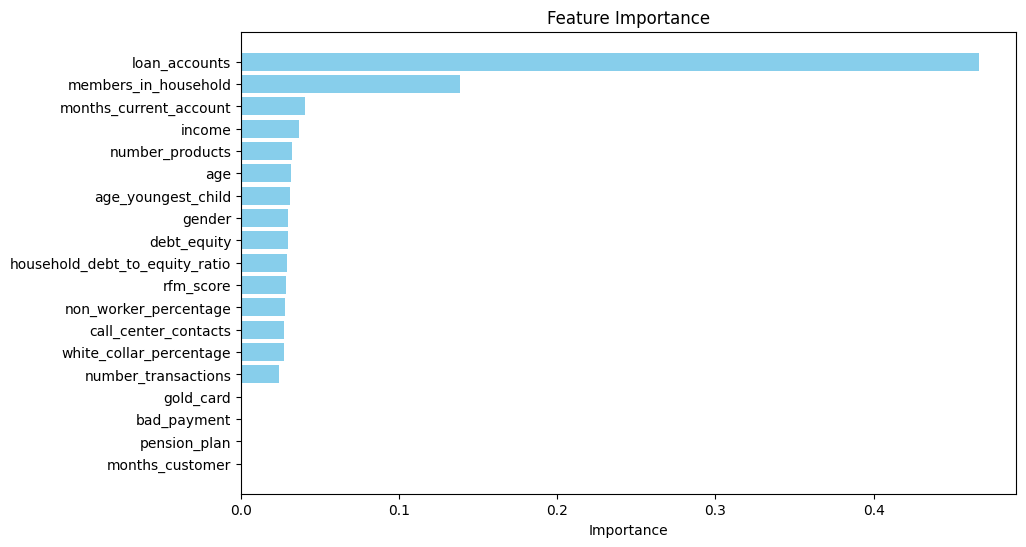

In [20]:
importances = best_model_m_xg.feature_importances_
fi_df = pd.DataFrame({"Feature": X_test_m.columns, "Importance": importances})
fi_df = fi_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,6))
plt.barh(fi_df["Feature"], fi_df["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

In [21]:
best_p_XGBoost = optimizers(XGBClassifier, X_train_p, y_train_p, X_test_p, y_test_p, n_trials = 350)

[I 2025-03-28 12:46:39,331] A new study created in memory with name: no-name-f0b907a9-b5bd-4c34-a035-2946dfedc1cf
[I 2025-03-28 12:46:39,600] Trial 0 finished with value: 0.7564428553058931 and parameters: {'n_estimators': 270, 'max_depth': 12, 'learning_rate': 0.1755713921541039, 'subsample': 0.8585213955654161, 'colsample_bytree': 0.9394203646558412, 'min_child_weight': 4, 'gamma': 2.639408410856113, 'reg_alpha': 2.6255755262396, 'reg_lambda': 4.2719490785277205, 'scale_pos_weight': 8.799133608217701}. Best is trial 0 with value: 0.7564428553058931.
[I 2025-03-28 12:46:39,723] Trial 1 finished with value: 0.7642618041239252 and parameters: {'n_estimators': 83, 'max_depth': 15, 'learning_rate': 0.17349507006370296, 'subsample': 0.979062733120984, 'colsample_bytree': 0.5852498081591184, 'min_child_weight': 3, 'gamma': 1.9631768707864083, 'reg_alpha': 6.053593956384362, 'reg_lambda': 4.546604362638202, 'scale_pos_weight': 4.2938089062505975}. Best is trial 1 with value: 0.76426180412392

In [22]:
best_model_p_xg = XGBClassifier(**best_p_XGBoost)
best_model_p_xg.fit(X_train_p, y_train_p)
evaluate_model(best_model_p_xg, X_test_p, y_test_p, pos_label=1)

{'accuracy': 0.570264765784114,
 'f1_score': 0.2895622895622896,
 'roc_auc': 0.7782799142197021,
 'precision': 0.8349514563106796,
 'recall': 0.17515274949083504}

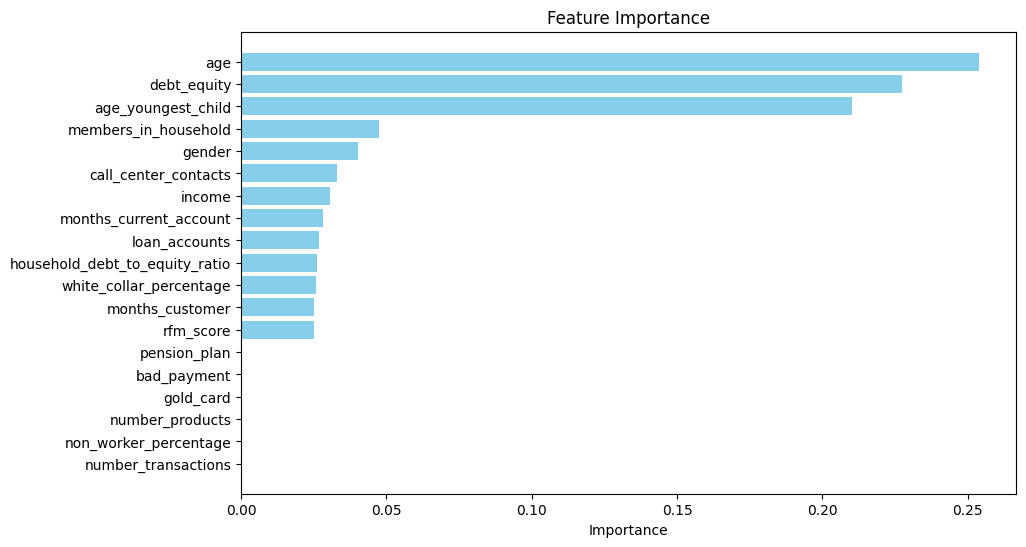

In [23]:
importances = best_model_p_xg.feature_importances_
fi_df = pd.DataFrame({"Feature": X_test_m.columns, "Importance": importances})
fi_df = fi_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,6))
plt.barh(fi_df["Feature"], fi_df["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

In [24]:
best_s_XGBoost = optimizers(XGBClassifier, X_train_s, y_train_s, X_valid_s, y_valid_s, n_trials = 350)

[I 2025-03-28 12:49:43,979] A new study created in memory with name: no-name-dd72ff36-fc39-47b7-b032-561b2d405585
[I 2025-03-28 12:49:46,702] Trial 0 finished with value: 0.6074201376803188 and parameters: {'n_estimators': 1345, 'max_depth': 11, 'learning_rate': 0.10625607365403428, 'subsample': 0.8609555892761233, 'colsample_bytree': 0.567848377517328, 'min_child_weight': 5, 'gamma': 0.0371074859976539, 'reg_alpha': 3.6645781365953045, 'reg_lambda': 3.8316667533336224, 'scale_pos_weight': 8.668188441933466}. Best is trial 0 with value: 0.6074201376803188.
[I 2025-03-28 12:49:47,475] Trial 1 finished with value: 0.6291405615500638 and parameters: {'n_estimators': 1360, 'max_depth': 3, 'learning_rate': 0.22763272177545704, 'subsample': 0.8196885511727818, 'colsample_bytree': 0.7821139860830967, 'min_child_weight': 7, 'gamma': 2.2067889061900265, 'reg_alpha': 4.668287839589568, 'reg_lambda': 5.1175877356153, 'scale_pos_weight': 4.972660521973065}. Best is trial 1 with value: 0.6291405615

In [25]:
best_model_s_xg = XGBClassifier(**best_s_XGBoost)
best_model_s_xg.fit(X_train_s,y_train_s)
evaluate_model(best_model_s_xg, X_test_s, y_test_s, pos_label=1)

{'accuracy': 0.570414201183432,
 'f1_score': 0.6934121621621622,
 'roc_auc': 0.6890445012429537,
 'precision': 0.5390676296782666,
 'recall': 0.9715976331360947}

Это лучший скор, который получался для `Savings`


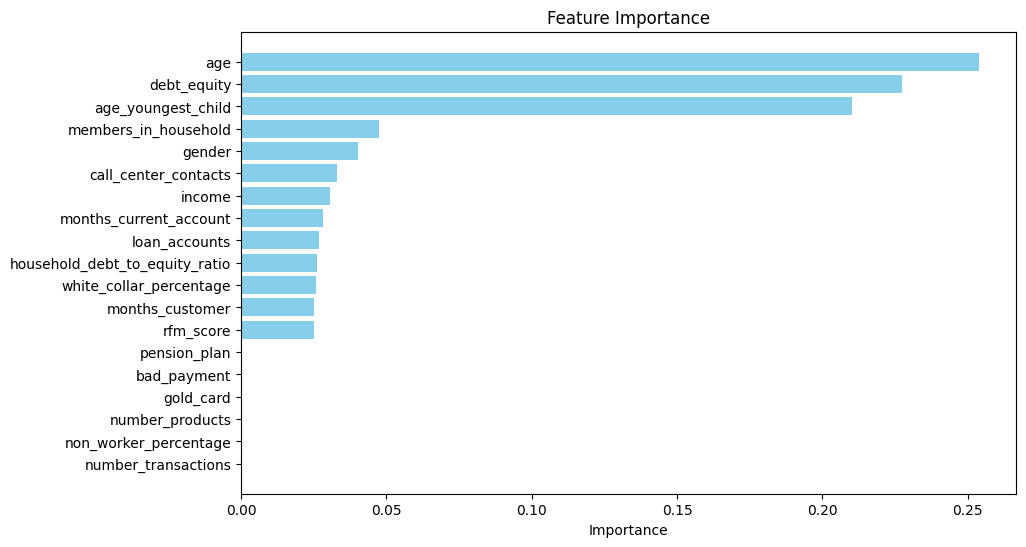

In [26]:
importances = best_model_p_xg.feature_importances_
fi_df = pd.DataFrame({"Feature": X_test_m.columns, "Importance": importances})
fi_df = fi_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,6))
plt.barh(fi_df["Feature"], fi_df["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

Сравним с catboost


In [27]:
def optimizers_catboost(X_train, y_train, X_valid, y_valid, n_trials=10):
  def objective(trial):
    params = {
        'iterations':trial.suggest_int("iterations", 200, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.2,0.7),
        "max_depth": trial.suggest_int("depth", 1, 8),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        'verbose': False,
        'random_state': 42,
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_valid)[:, 1]
    y_pred = model.predict(X_valid)
    return roc_auc_score(y_valid, y_pred_proba)

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=n_trials)
  return study.best_params

In [28]:
best_m = optimizers_catboost(X_train_m, y_train_m, X_valid_m, y_valid_m, n_trials = 30)

[I 2025-03-28 12:52:33,088] A new study created in memory with name: no-name-4966a465-a158-43a8-90b0-88883d6060e7
[I 2025-03-28 12:52:36,962] Trial 0 finished with value: 0.9444991095280499 and parameters: {'iterations': 522, 'learning_rate': 0.16377868266802378, 'l2_leaf_reg': 3.991379352007029, 'random_strength': 0.6791946421468955, 'bagging_temperature': 0.9298006253655351, 'border_count': 104, 'colsample_bylevel': 0.6522116868410741, 'depth': 1, 'boosting_type': 'Ordered'}. Best is trial 0 with value: 0.9444991095280499.
[I 2025-03-28 12:52:37,959] Trial 1 finished with value: 0.9458748886910062 and parameters: {'iterations': 595, 'learning_rate': 0.1413257212363836, 'l2_leaf_reg': 0.008045655980179561, 'random_strength': 2.0057967923815694, 'bagging_temperature': 0.22343239009221882, 'border_count': 140, 'colsample_bylevel': 0.2335595487470497, 'depth': 2, 'boosting_type': 'Plain'}. Best is trial 1 with value: 0.9458748886910062.
[I 2025-03-28 12:52:39,002] Trial 2 finished with v

In [29]:
best_model_m = CatBoostClassifier(**best_m, verbose=250)
best_model_m.fit(X_train_m,y_train_m)
evaluate_model(best_model_m, X_test_m, y_test_m, pos_label=1)

0:	learn: 0.6605897	total: 12.1ms	remaining: 3.88s
250:	learn: 0.1937165	total: 2.74s	remaining: 776ms
321:	learn: 0.1896941	total: 3.42s	remaining: 0us


{'accuracy': 0.7762762762762763,
 'f1_score': 0.7315315315315315,
 'roc_auc': 0.9431864296729161,
 'precision': 0.9144144144144144,
 'recall': 0.6096096096096096}

In [30]:
best_p = optimizers_catboost(X_train_p, y_train_p, X_test_p, y_test_p, n_trials = 30)

[I 2025-03-28 12:54:35,396] A new study created in memory with name: no-name-3382ca91-2985-4bc8-8761-460c6a8e96bb
[I 2025-03-28 12:54:38,645] Trial 0 finished with value: 0.7323057395647107 and parameters: {'iterations': 977, 'learning_rate': 0.03163476733561287, 'l2_leaf_reg': 0.0017144895231710599, 'random_strength': 4.5240423788019895, 'bagging_temperature': 0.17055609269865413, 'border_count': 161, 'colsample_bylevel': 0.2945614796563958, 'depth': 8, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.7323057395647107.
[I 2025-03-28 12:54:39,596] Trial 1 finished with value: 0.7179786047013246 and parameters: {'iterations': 231, 'learning_rate': 0.15768022052653066, 'l2_leaf_reg': 0.006145952021624718, 'random_strength': 0.023324433740648978, 'bagging_temperature': 0.9125274980736375, 'border_count': 215, 'colsample_bylevel': 0.3954891516831993, 'depth': 8, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.7323057395647107.
[I 2025-03-28 12:54:42,470] Trial 2 finished w

In [31]:
best_model_p = CatBoostClassifier(**best_p, verbose=250)
best_model_p.fit(X_train_p, y_train_p)
evaluate_model(best_model_p, X_test_p, y_test_p, pos_label=1)

0:	learn: 0.6799814	total: 8.59ms	remaining: 4.66s
250:	learn: 0.4237646	total: 2.28s	remaining: 2.67s
500:	learn: 0.4190510	total: 4.62s	remaining: 396ms
543:	learn: 0.4185395	total: 5.01s	remaining: 0us


{'accuracy': 0.5539714867617108,
 'f1_score': 0.21785714285714286,
 'roc_auc': 0.7736569866559372,
 'precision': 0.8840579710144928,
 'recall': 0.12423625254582485}

In [32]:
best_s = optimizers_catboost(X_train_s, y_train_s, X_valid_s, y_valid_s, n_trials = 30)

[I 2025-03-28 12:57:06,584] A new study created in memory with name: no-name-e4290464-f89f-464d-81cb-856bdd7dc897
[I 2025-03-28 12:57:12,410] Trial 0 finished with value: 0.6546027187995513 and parameters: {'iterations': 622, 'learning_rate': 0.06343302869356178, 'l2_leaf_reg': 0.0023118427103655335, 'random_strength': 5.893554253589245, 'bagging_temperature': 0.7659254008817106, 'border_count': 221, 'colsample_bylevel': 0.5342064084968934, 'depth': 3, 'boosting_type': 'Ordered'}. Best is trial 0 with value: 0.6546027187995513.
[I 2025-03-28 12:57:16,950] Trial 1 finished with value: 0.6574912016088487 and parameters: {'iterations': 442, 'learning_rate': 0.02190030373839256, 'l2_leaf_reg': 0.001837389349757437, 'random_strength': 0.25260643028918894, 'bagging_temperature': 0.2072356079749469, 'border_count': 43, 'colsample_bylevel': 0.3319497985897234, 'depth': 6, 'boosting_type': 'Ordered'}. Best is trial 1 with value: 0.6574912016088487.
[I 2025-03-28 12:57:17,999] Trial 2 finished w

In [33]:
best_model_s = CatBoostClassifier(**best_s, verbose=250)
best_model_s.fit(X_train_s,y_train_s)
evaluate_model(best_model_s, X_test_s, y_test_s, pos_label=1)

0:	learn: 0.6910798	total: 7.37ms	remaining: 2.59s
250:	learn: 0.6170757	total: 1.81s	remaining: 729ms
351:	learn: 0.6118159	total: 2.9s	remaining: 0us


{'accuracy': 0.5224852071005918,
 'f1_score': 0.1256771397616468,
 'roc_auc': 0.6937677252197052,
 'precision': 0.7435897435897436,
 'recall': 0.06863905325443787}

Рассмотрим LightGBM


In [34]:
from optuna.pruners import HyperbandPruner
from optuna.integration import LightGBMPruningCallback

def optimize_lgbm(model_lib, X_train, y_train, X_valid, y_valid, n_trials=10):
    def objective(trial):
        params = {
            'objective': 'binary',
            'metric': 'auc',
            'boosting_type': 'gbdt',
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 20, 300),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
            'random_state': 42,
            'n_jobs': -1,
            'verbosity': -1,
            'early_stopping_rounds': 20,# Отключаем логи LightGBM
        }

        pruning_callback = LightGBMPruningCallback(
            trial,
            metric='auc',
            valid_name='valid_0',
        )

        model = model_lib(**params)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_valid, y_valid)],  # Обязательно передаем eval_set
            callbacks=[pruning_callback],    # Передаем callback
            #early_stopping_rounds=20,        # Ранняя остановка
            #verbose=False                    # Отключаем вывод
        )

        y_pred_proba = model.predict_proba(X_valid)[:, 1]
        return roc_auc_score(y_valid, y_pred_proba)

    # Настройка HyperbandPruner
    study = optuna.create_study(
        direction='maximize',  # Для roc_auc_score
        pruner=optuna.pruners.HyperbandPruner()
    )
    study.optimize(objective,n_trials = n_trials, timeout=420)
    return study.best_params

In [35]:
best_m_LGBM = optimize_lgbm(LGBMClassifier, X_train_m, y_train_m, X_valid_m, y_valid_m, n_trials = 500)

[I 2025-03-28 12:58:49,585] A new study created in memory with name: no-name-970d9de1-4a6a-44a2-ab84-5b552bd20a7f
[I 2025-03-28 12:58:49,878] Trial 0 finished with value: 0.9474243098842386 and parameters: {'n_estimators': 391, 'learning_rate': 0.24537965113197016, 'num_leaves': 232, 'max_depth': 11, 'min_child_samples': 39, 'subsample': 0.9983069837390544, 'colsample_bytree': 0.5060240347300613, 'reg_alpha': 5.6503881259027, 'reg_lambda': 5.40085982525675}. Best is trial 0 with value: 0.9474243098842386.
[I 2025-03-28 12:58:50,113] Trial 1 finished with value: 0.9486642920747996 and parameters: {'n_estimators': 418, 'learning_rate': 0.028813071297498393, 'num_leaves': 181, 'max_depth': 4, 'min_child_samples': 82, 'subsample': 0.9960219491470649, 'colsample_bytree': 0.7661450947701269, 'reg_alpha': 8.5060036895991, 'reg_lambda': 0.7649736915827376}. Best is trial 1 with value: 0.9486642920747996.
[I 2025-03-28 12:58:50,377] Trial 2 finished with value: 0.9490227070347284 and parameters

In [36]:
best_m_LGBM
best_model_m = LGBMClassifier(**best_m_LGBM, verbose=-1)
best_model_m.fit(X_train_m,y_train_m)
evaluate_model(best_model_m, X_test_m, y_test_m, pos_label=1)

{'accuracy': 0.7552552552552553,
 'f1_score': 0.6987060998151571,
 'roc_auc': 0.9357871384898412,
 'precision': 0.9086538461538461,
 'recall': 0.5675675675675675}

In [37]:
best_p_LGBM = optimize_lgbm(LGBMClassifier, X_train_p, y_train_p, X_valid_p, y_valid_p, n_trials = 500)

[I 2025-03-28 12:59:50,590] A new study created in memory with name: no-name-30f94273-b271-42df-bc5d-0b5bbf449b39
[I 2025-03-28 12:59:50,749] Trial 0 finished with value: 0.7832289124843368 and parameters: {'n_estimators': 139, 'learning_rate': 0.20022527774867585, 'num_leaves': 133, 'max_depth': 7, 'min_child_samples': 18, 'subsample': 0.9991602058319079, 'colsample_bytree': 0.8312254905669064, 'reg_alpha': 3.4232895999129456, 'reg_lambda': 0.9522683264783427}. Best is trial 0 with value: 0.7832289124843368.
[I 2025-03-28 12:59:50,898] Trial 1 finished with value: 0.7886549495482424 and parameters: {'n_estimators': 343, 'learning_rate': 0.025027883871793437, 'num_leaves': 148, 'max_depth': 6, 'min_child_samples': 29, 'subsample': 0.7669391653855486, 'colsample_bytree': 0.8414811355868399, 'reg_alpha': 1.9555628764053568, 'reg_lambda': 0.4150619116665777}. Best is trial 1 with value: 0.7886549495482424.
[I 2025-03-28 12:59:51,033] Trial 2 finished with value: 0.7857267691090154 and par

In [38]:
best_p_LGBM
best_model_p = LGBMClassifier(**best_p_LGBM, verbose=-1)
best_model_p.fit(X_train_p, y_train_p)
evaluate_model(best_model_p, X_test_p, y_test_p, pos_label=1)

{'accuracy': 0.5539714867617108,
 'f1_score': 0.23157894736842105,
 'roc_auc': 0.7629137095001266,
 'precision': 0.8354430379746836,
 'recall': 0.13441955193482688}

In [39]:
best_s_LGBM = optimize_lgbm(LGBMClassifier, X_train_s, y_train_s, X_valid_s, y_valid_s, n_trials = 500)

[I 2025-03-28 13:00:54,262] A new study created in memory with name: no-name-6a832917-df2c-4ab3-a2e5-67b9d42d2c7c
[I 2025-03-28 13:00:54,335] Trial 0 finished with value: 0.6671065862242334 and parameters: {'n_estimators': 432, 'learning_rate': 0.12552549831570983, 'num_leaves': 65, 'max_depth': 3, 'min_child_samples': 28, 'subsample': 0.6610326427703141, 'colsample_bytree': 0.9490316908401157, 'reg_alpha': 6.235472983449278, 'reg_lambda': 3.2424484749166362}. Best is trial 0 with value: 0.6671065862242334.
[I 2025-03-28 13:00:54,412] Trial 1 finished with value: 0.6567152995320417 and parameters: {'n_estimators': 810, 'learning_rate': 0.15165507825702543, 'num_leaves': 178, 'max_depth': 5, 'min_child_samples': 16, 'subsample': 0.5022535657956871, 'colsample_bytree': 0.692112564102904, 'reg_alpha': 7.526391664676283, 'reg_lambda': 3.1492947363042703}. Best is trial 0 with value: 0.6671065862242334.
[I 2025-03-28 13:00:54,486] Trial 2 finished with value: 0.6521396527052636 and paramete

In [40]:
best_s_LGBM
best_model_s = LGBMClassifier(**best_s_LGBM, verbose=-1)
best_model_s.fit(X_train_s,y_train_s)
evaluate_model(best_model_s, X_test_s, y_test_s, pos_label=1)

{'accuracy': 0.5751479289940828,
 'f1_score': 0.44598765432098764,
 'roc_auc': 0.6803424249851195,
 'precision': 0.6407982261640798,
 'recall': 0.34201183431952664}